# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Data Exploration

In this section, we'll thoroughly explore our dataset to understand:
- **Dataset structure and dimensions**
- **Missing values and data quality**
- **Target variable distribution** 
- **Feature characteristics and relationships**
- **Text data patterns and statistics**

This exploration will inform our preprocessing decisions and help us build an effective machine learning pipeline.

## Dataset Overview


In [4]:
# Data Exploration

# First, let's examine the shape and structure of our data
print("Dataset shape:", df.shape)
print("\nColumn names and types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()


Dataset shape: (18442, 9)

Column names and types:
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
Recommended IND             int64
dtype: object

First few rows:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Data Quality Assessment

Let's check for missing values and assess the overall quality of our dataset. Understanding data completeness is crucial for designing our preprocessing pipeline.


In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


Missing values per column:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

Percentage of missing values:
Clothing ID                0.0
Age                        0.0
Title                      0.0
Review Text                0.0
Positive Feedback Count    0.0
Division Name              0.0
Department Name            0.0
Class Name                 0.0
Recommended IND            0.0
dtype: float64


## Target Variable Analysis

Understanding the distribution of our target variable (Recommended IND) is essential for:
- **Assessing class balance** - Do we have balanced positive/negative recommendations?
- **Selecting appropriate metrics** - Should we focus on accuracy, precision, recall, or F1-score?
- **Identifying potential bias** - Are there any patterns in the recommendation distribution?


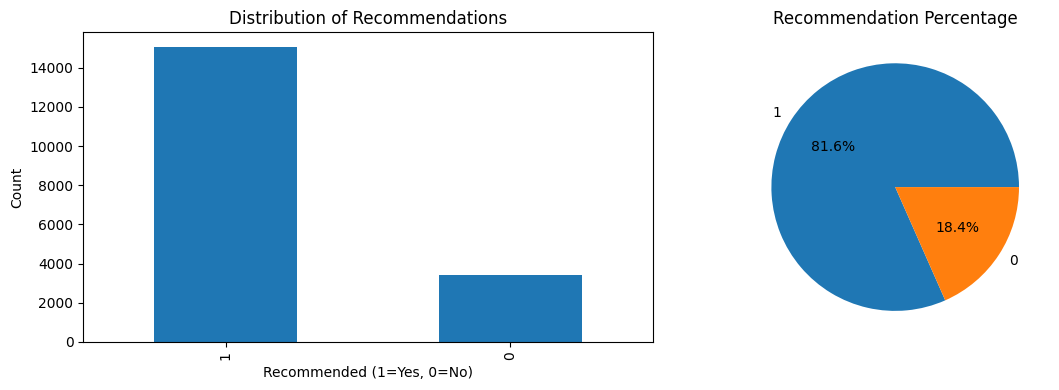

Total samples: 18442
Recommended: 15053 (81.62%)
Not recommended: 3389 (18.38%)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Recommended IND'].value_counts().plot(kind='bar')
plt.title('Distribution of Recommendations')
plt.xlabel('Recommended (1=Yes, 0=No)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Recommended IND'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Recommendation Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"Total samples: {len(df)}")
print(f"Recommended: {df['Recommended IND'].sum()} ({df['Recommended IND'].mean():.2%})")
print(f"Not recommended: {len(df) - df['Recommended IND'].sum()} ({1 - df['Recommended IND'].mean():.2%})")


## Categorical and Numerical Features Analysis

Now let's explore our categorical features (Division, Department, Class Names) and numerical features (Age, Clothing ID, Positive Feedback Count):

- **Categorical Features**: Understanding the variety and distribution helps us choose appropriate encoding strategies
- **Numerical Features**: Analyzing distributions helps us determine if scaling or normalization is needed
- **Age Demographics**: Customer age patterns may reveal important insights about recommendation behavior


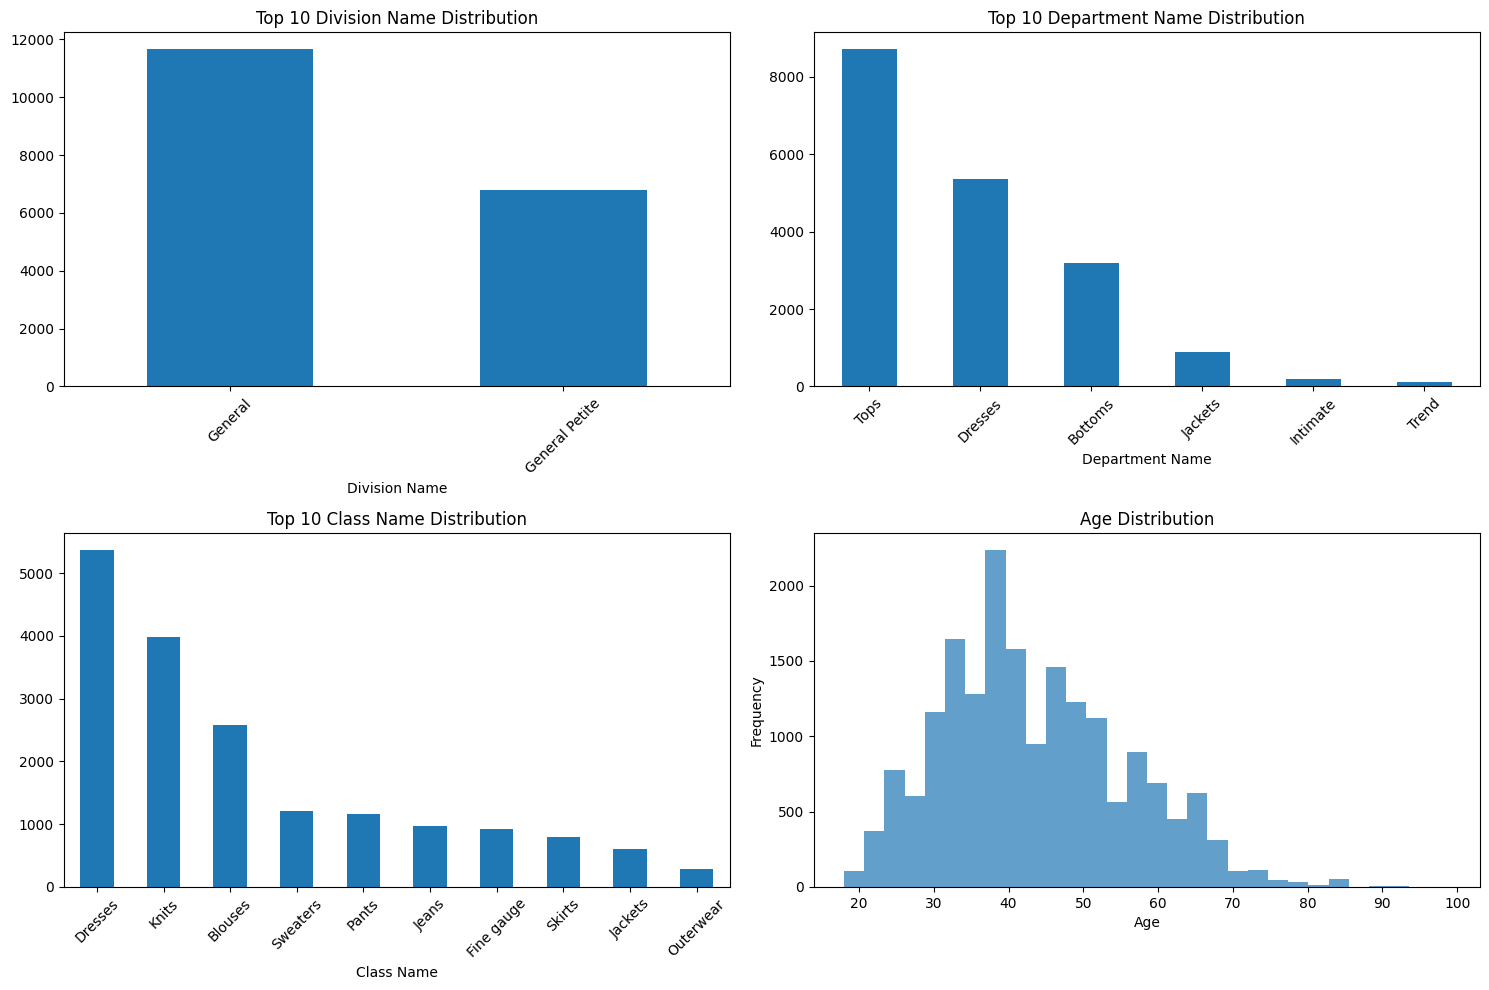

Division Name: 2 unique values
Department Name: 6 unique values
Class Name: 14 unique values


In [7]:
# Analyze categorical variables
categorical_cols = ['Division Name', 'Department Name', 'Class Name']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Plot categorical variable distributions
for i, col in enumerate(categorical_cols):
    if col in df.columns:
        df[col].value_counts().head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Top 10 {col} Distribution')
        axes[i].tick_params(axis='x', rotation=45)

# Age distribution
axes[3].hist(df['Age'], bins=30, alpha=0.7)
axes[3].set_title('Age Distribution')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print unique counts for categorical variables
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")


## Text Data Analysis

Text features (Title and Review Text) are likely to be the most predictive features for recommendation classification. Let's analyze:

- **Text Length Patterns**: Do longer/shorter reviews correlate with recommendations?
- **Content Quality**: What types of words and phrases appear in positive vs negative reviews?
- **Text Statistics**: Character counts, word counts, and other linguistic features



=== Title Analysis ===
Average length: 19.1 characters
Median length: 17.0 characters
Max length: 52 characters

Sample Title:
1. Some major design flaws
2. My favorite buy!
3. Flattering shirt

=== Review Text Analysis ===
Average length: 320.0 characters
Median length: 317.5 characters
Max length: 508 characters

Sample Review Text:
1. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
2. I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
3. This shirt is very flatteri

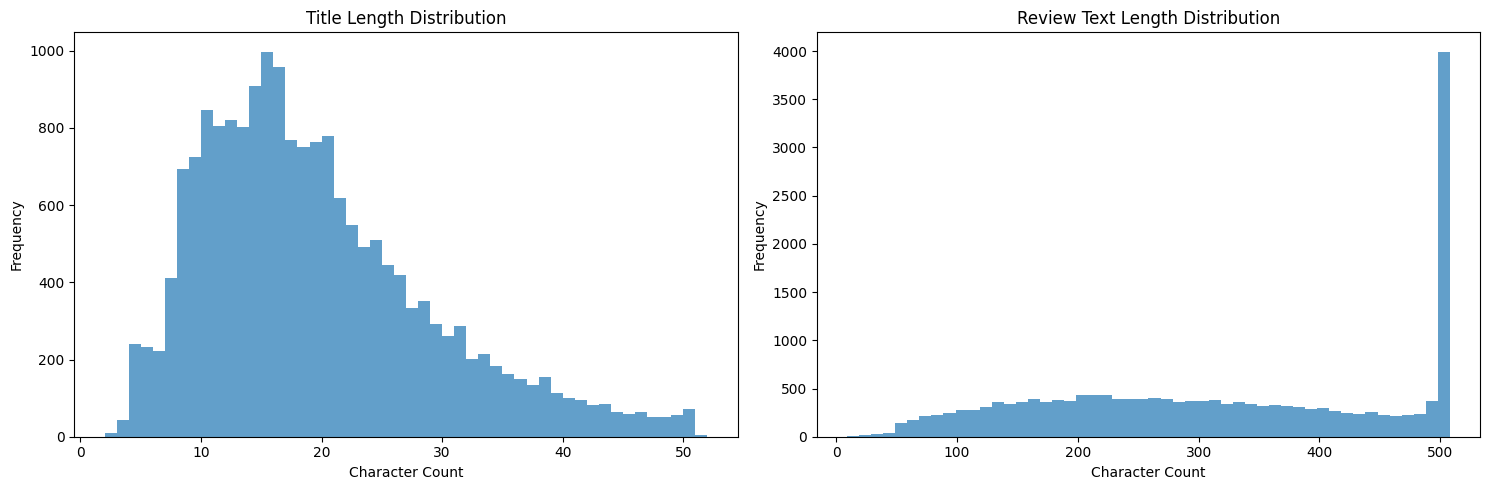

In [8]:
# Analyze text data
text_cols = ['Title', 'Review Text']

for col in text_cols:
    if col in df.columns:
        print(f"\n=== {col} Analysis ===")
        
        # Basic statistics
        df[f'{col}_length'] = df[col].astype(str).str.len()
        print(f"Average length: {df[f'{col}_length'].mean():.1f} characters")
        print(f"Median length: {df[f'{col}_length'].median():.1f} characters")
        print(f"Max length: {df[f'{col}_length'].max()} characters")
        
        # Sample entries
        print(f"\nSample {col}:")
        for i, text in enumerate(df[col].dropna().head(3)):
            print(f"{i+1}. {text}")

# Visualize text lengths
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(text_cols):
    if col in df.columns:
        axes[i].hist(df[f'{col}_length'], bins=50, alpha=0.7)
        axes[i].set_title(f'{col} Length Distribution')
        axes[i].set_xlabel('Character Count')
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Feature Correlation Analysis

Understanding relationships between features and our target variable helps us:

- **Identify strong predictors**: Which features are most correlated with recommendations?
- **Detect multicollinearity**: Are any features highly correlated with each other?
- **Guide feature engineering**: Should we create interaction terms or derived features?

### Numerical Feature Correlations


# Building Pipeline

Based on our data exploration, we now understand the structure and characteristics of our dataset. In this section, we'll build a comprehensive machine learning pipeline that can:

- **Handle mixed data types**: Numerical, categorical, and text features
- **Apply appropriate preprocessing**: Scaling, encoding, and text processing
- **Extract meaningful features**: Advanced NLP techniques and feature engineering
- **Ensure robustness**: Error handling and multiprocessing compatibility

Our pipeline will integrate all preprocessing steps with model training for seamless end-to-end processing.

## Library Imports and Setup


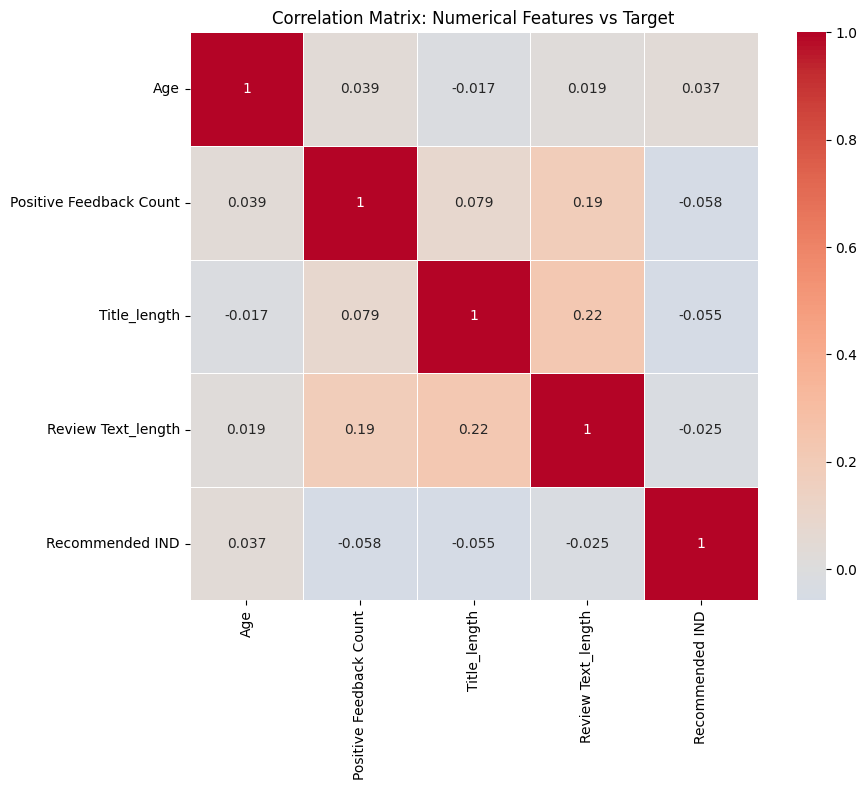

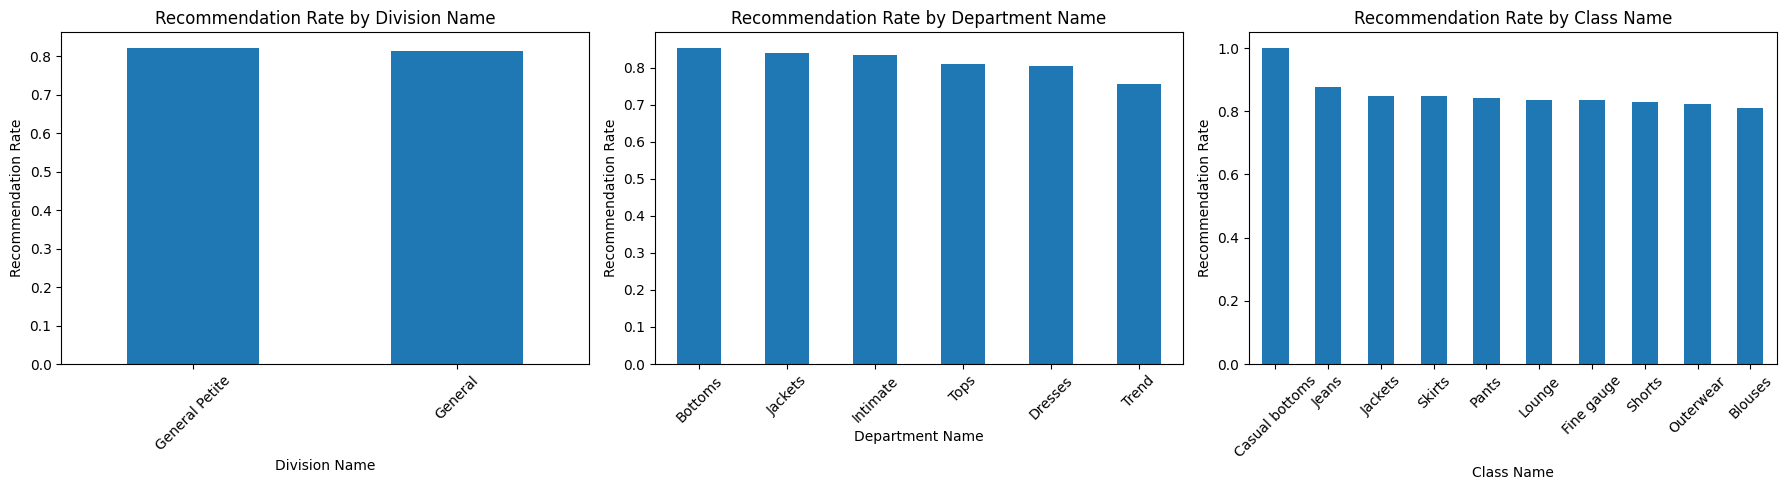

In [9]:
# Analyze correlations between numerical features and target
numerical_cols = ['Age', 'Positive Feedback Count', 'Title_length', 'Review Text_length']
target_col = 'Recommended IND'

correlation_data = df[numerical_cols + [target_col]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Numerical Features vs Target')
plt.tight_layout()
plt.show()

# Analyze recommendation rates by categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        recommendation_rates = df.groupby(col)['Recommended IND'].mean().sort_values(ascending=False)
        recommendation_rates.head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Recommendation Rate by {col}')
        axes[i].set_ylabel('Recommendation Rate')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Advanced Text Preprocessing

Text data requires specialized preprocessing to extract meaningful features. We'll create custom transformers that:

- **Clean and normalize text**: Remove noise, standardize formatting
- **Apply NLP techniques**: Tokenization, lemmatization, stopword removal  
- **Handle multiprocessing**: Lazy loading to avoid serialization issues
- **Provide fallbacks**: Robust error handling for production deployment

### Custom Text Preprocessor


In [10]:
# Building Pipeline

# Import necessary libraries for pipeline construction
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import ConvergenceWarning
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
except:
    print("NLTK downloads may have failed, but proceeding anyway")


In [11]:
# Custom transformer for advanced text preprocessing
class AdvancedTextPreprocessor(BaseEstimator, TransformerMixin):
    """
    Advanced NLP text preprocessor that applies multiple techniques:
    - Text cleaning and normalization
    - Lemmatization
    - Stop word removal
    - Feature extraction (length, sentiment indicators)
    """
    
    def __init__(self, remove_stopwords=True, lemmatize=True):
        self.remove_stopwords = remove_stopwords
        self.lemmatize = lemmatize
        # Initialize NLTK objects lazily to avoid pickling issues
        self._lemmatizer = None
        self._stop_words = None
    
    def _get_lemmatizer(self):
        """Lazy initialization of lemmatizer"""
        if self._lemmatizer is None:
            try:
                self._lemmatizer = WordNetLemmatizer()
            except:
                self._lemmatizer = None
        return self._lemmatizer
    
    def _get_stop_words(self):
        """Lazy initialization of stop words"""
        if self._stop_words is None:
            try:
                self._stop_words = set(stopwords.words('english'))
            except:
                # Fallback to basic English stop words
                self._stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 
                                   'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 
                                   'that', 'the', 'to', 'was', 'will', 'with', 'the', 'this', 'but', 'they', 'have', 'had', 'what', 'said', 'each', 'which', 'she', 'do', 
                                   'how', 'their', 'if', 'up', 'out', 'many', 'then', 'them', 'these', 'so', 'some', 'her', 'would', 
                                   'make', 'like', 'into', 'him', 'time', 'two', 'more', 'go', 'no', 'way', 'could', 'my', 'than', 
                                   'first', 'been', 'call', 'who', 'oil', 'sit', 'now', 'find', 'down', 'day', 'did', 'get', 'come', 
                                   'made', 'may', 'part'}
        return self._stop_words
    
    def clean_text(self, text):
        """Clean and normalize text"""
        if pd.isna(text):
            return ""
        
        # Convert to lowercase
        text = str(text).lower()
        
        # Remove punctuation and special characters, keep spaces
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        
        # Remove extra whitespace
        text = ' '.join(text.split())
        
        return text
    
    def preprocess_text(self, text):
        """Apply advanced preprocessing techniques"""
        # Clean text
        text = self.clean_text(text)
        
        # Simple tokenization (more robust than NLTK for multiprocessing)
        tokens = text.split()
        
        # Remove stopwords if specified
        if self.remove_stopwords:
            stop_words = self._get_stop_words()
            tokens = [token for token in tokens if token not in stop_words]
        
        # Simple lemmatization (more robust approach)
        if self.lemmatize:
            lemmatizer = self._get_lemmatizer()
            if lemmatizer:
                try:
                    tokens = [lemmatizer.lemmatize(token) for token in tokens]
                except:
                    pass  # Skip if lemmatization fails
        
        return ' '.join(tokens)
    
    def fit(self, X, y=None):
        # Initialize objects during fit to ensure they're available
        self._get_lemmatizer()
        self._get_stop_words()
        return self
    
    def transform(self, X):
        """Transform text data"""
        if isinstance(X, pd.Series):
            return X.apply(self.preprocess_text)
        else:
            return [self.preprocess_text(text) for text in X]


## Pipeline Construction

Now we'll assemble our preprocessing pipeline that handles all data types appropriately:

- **Numerical Pipeline**: StandardScaler for age, feedback count, clothing ID
- **Categorical Pipeline**: OneHotEncoder for division, department, class names
- **Text Pipelines**: Separate processing for titles and review text with TF-IDF
- **Feature Extraction**: Custom numerical features from text data

The `ColumnTransformer` will apply the appropriate preprocessing to each column type.


In [12]:
# Custom transformer for feature engineering from text
class TextFeatureExtractor(BaseEstimator, TransformerMixin):
    """
    Extract numerical features from text data:
    - Text length (characters and words)
    - Sentiment indicators (positive/negative words)
    - Punctuation patterns
    - Readability measures
    """
    
    def __init__(self):
        # Define sentiment word lists (simplified)
        self.positive_words = {'good', 'great', 'excellent', 'amazing', 'wonderful', 'perfect', 
                              'love', 'beautiful', 'comfortable', 'quality', 'recommend', 'best',
                              'fantastic', 'awesome', 'nice', 'pleased', 'satisfied', 'happy'}
        
        self.negative_words = {'bad', 'terrible', 'awful', 'horrible', 'ugly', 'uncomfortable',
                              'poor', 'worst', 'hate', 'disappointed', 'unsatisfied', 'cheap',
                              'flimsy', 'small', 'large', 'tight', 'loose', 'wrong', 'defective'}
    
    def extract_features(self, text):
        """Extract features from a single text"""
        if pd.isna(text):
            text = ""
        text = str(text).lower()
        
        features = {}
        
        # Basic length features
        features['char_count'] = len(text)
        features['word_count'] = len(text.split())
        features['avg_word_length'] = features['char_count'] / max(features['word_count'], 1)
        
        # Punctuation features
        features['exclamation_count'] = text.count('!')
        features['question_count'] = text.count('?')
        features['period_count'] = text.count('.')
        
        # Sentiment features
        words = text.split()
        features['positive_word_count'] = sum(1 for word in words if word in self.positive_words)
        features['negative_word_count'] = sum(1 for word in words if word in self.negative_words)
        features['sentiment_ratio'] = (features['positive_word_count'] - features['negative_word_count']) / max(features['word_count'], 1)
        
        # Capital letters (indication of emphasis)
        original_text = str(text) if not pd.isna(text) else ""
        features['capital_ratio'] = sum(1 for c in original_text if c.isupper()) / max(len(original_text), 1)
        
        return features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """Transform text data to numerical features"""
        if isinstance(X, pd.Series):
            feature_list = [self.extract_features(text) for text in X]
        else:
            feature_list = [self.extract_features(text) for text in X]
        
        # Convert to DataFrame
        return pd.DataFrame(feature_list)


## Complete Machine Learning Pipelines

We'll create end-to-end pipelines that combine our preprocessing with different machine learning algorithms:

- **Logistic Regression**: Linear model good for text classification with TF-IDF features
- **Random Forest**: Ensemble method that can capture non-linear relationships

Each pipeline includes:
1. **All preprocessing steps** (scaling, encoding, text processing, feature extraction)
2. **Model training and prediction**
3. **Proper parameter configuration** for stability and performance


# Training Pipeline

With our preprocessing pipelines built, we now move to model training and evaluation. This section focuses on:

- **Training multiple models** on our prepared dataset
- **Comprehensive evaluation** with multiple metrics and visualizations
- **Cross-validation** to ensure robust performance estimates
- **Clean, professional output** with pandas DataFrames for easy analysis

We'll ensure proper train/test methodology to avoid data leakage and get reliable performance estimates.

## Model Evaluation Framework


In [13]:
# Define column types for preprocessing
numerical_columns = ['Age', 'Positive Feedback Count', 'Clothing ID']
categorical_columns = ['Division Name', 'Department Name', 'Class Name']
text_columns = ['Title', 'Review Text']

print("Column categorization:")
print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")
print(f"Text columns: {text_columns}")

# Create preprocessing pipeline for different data types
def create_preprocessing_pipeline():
    """
    Create a comprehensive preprocessing pipeline that handles:
    - Numerical features: scaling
    - Categorical features: one-hot encoding
    - Text features: advanced NLP preprocessing + TF-IDF + feature extraction
    """
    
    # Numerical preprocessing: handle missing values and scale
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Categorical preprocessing: handle missing values and encode
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # Text preprocessing pipeline for titles
    title_text_transformer = Pipeline(steps=[
        ('text_preprocessor', AdvancedTextPreprocessor()),
        ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1, 2), min_df=2))
    ])
    
    # Text preprocessing pipeline for review text
    review_text_transformer = Pipeline(steps=[
        ('text_preprocessor', AdvancedTextPreprocessor()),
        ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=2))
    ])
    
    # Feature extraction from text
    title_feature_transformer = Pipeline(steps=[
        ('feature_extractor', TextFeatureExtractor())
    ])
    
    review_feature_transformer = Pipeline(steps=[
        ('feature_extractor', TextFeatureExtractor())
    ])
    
    # Combine all preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns),
            ('title_text', title_text_transformer, 'Title'),
            ('review_text', review_text_transformer, 'Review Text'),
            ('title_features', title_feature_transformer, 'Title'),
            ('review_features', review_feature_transformer, 'Review Text')
        ],
        remainder='drop'  # Drop any remaining columns
    )
    
    return preprocessor

# Create the preprocessor
preprocessor = create_preprocessing_pipeline()
print("\\nPreprocessing pipeline created successfully!")


Column categorization:
Numerical columns: ['Age', 'Positive Feedback Count', 'Clothing ID']
Categorical columns: ['Division Name', 'Department Name', 'Class Name']
Text columns: ['Title', 'Review Text']
\nPreprocessing pipeline created successfully!


## Model Training and Evaluation

Now we'll train each model pipeline and evaluate their performance on the test set:

**Evaluation Metrics:**
- **Accuracy**: Overall correctness
- **Precision**: Of predicted recommendations, how many were actually recommended?
- **Recall**: Of actual recommendations, how many did we identify?
- **F1-Score**: Harmonic mean of precision and recall (balanced measure)

**Visualizations:**
- **Confusion Matrices**: Show prediction accuracy for each class
- **Classification Reports**: Detailed per-class performance metrics


In [14]:
# Create complete machine learning pipelines
def create_ml_pipelines():
    """
    Create complete ML pipelines combining preprocessing with different models
    """
    
    # Create base preprocessor
    preprocessor = create_preprocessing_pipeline()
    
    # Define multiple models to compare
    models = {
        'logistic_regression': Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(
                random_state=42, 
                max_iter=2000,  # Increased iterations to prevent convergence warnings
                solver='liblinear',  # Better solver for high-dimensional data
                C=1.0  # Regularization parameter
            ))
        ]),
        
        'random_forest': Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(
                random_state=42, 
                n_estimators=100,
                n_jobs=1  # Single process to avoid issues with text preprocessing
            ))
        ])
    }
    
    return models

# Create the pipelines
ml_pipelines = create_ml_pipelines()

print("Machine Learning Pipelines created:")
for name in ml_pipelines.keys():
    print(f"- {name}")
    
print("\\nEach pipeline includes:")
print("1. Numerical feature scaling")
print("2. Categorical feature encoding")
print("3. Advanced text preprocessing with NLP techniques")
print("4. TF-IDF vectorization of text")
print("5. Text feature extraction")
print("6. Model training and prediction")


Machine Learning Pipelines created:
- logistic_regression
- random_forest
\nEach pipeline includes:
1. Numerical feature scaling
2. Categorical feature encoding
3. Advanced text preprocessing with NLP techniques
4. TF-IDF vectorization of text
5. Text feature extraction
6. Model training and prediction


# Fine-Tuning Pipeline

Having established baseline performance with our models, we now optimize them through hyperparameter tuning. This section demonstrates:

- **Systematic parameter optimization** using GridSearchCV
- **Cross-validated performance** to avoid overfitting to validation data
- **Comprehensive parameter spaces** covering both preprocessing and model parameters
- **Performance improvement tracking** comparing baseline vs tuned models

**Why Hyperparameter Tuning Matters:**
- **Unlocks model potential**: Default parameters are rarely optimal
- **Balances bias-variance tradeoff**: Finds the sweet spot for generalization
- **Optimizes for business metrics**: Focus on F1-score for balanced performance
- **Ensures reproducibility**: Systematic approach vs manual trial-and-error

## Hyperparameter Grid Definition


🚀 TRAINING MODELS ON TRAINING SET
Training set size: 16,597 samples
Test set size: 1,845 samples
\n==================================================
Training logistic_regression...
\n=== logistic_regression Performance ===
Accuracy:  0.8976
Precision: 0.9262
Recall:    0.9513
F1-Score:  0.9386
\nClassification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       327
           1       0.93      0.95      0.94      1518

    accuracy                           0.90      1845
   macro avg       0.83      0.80      0.82      1845
weighted avg       0.89      0.90      0.89      1845



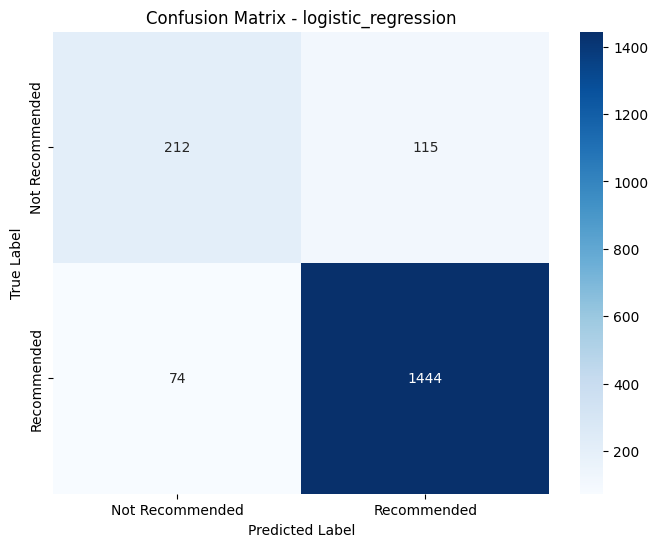

✅ logistic_regression training completed!
\n==================================================
Training random_forest...
\n=== random_forest Performance ===
Accuracy:  0.8688
Precision: 0.8834
Recall:    0.9684
F1-Score:  0.9239
\nClassification Report:
              precision    recall  f1-score   support

           0       0.73      0.41      0.52       327
           1       0.88      0.97      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.81      0.69      0.72      1845
weighted avg       0.86      0.87      0.85      1845



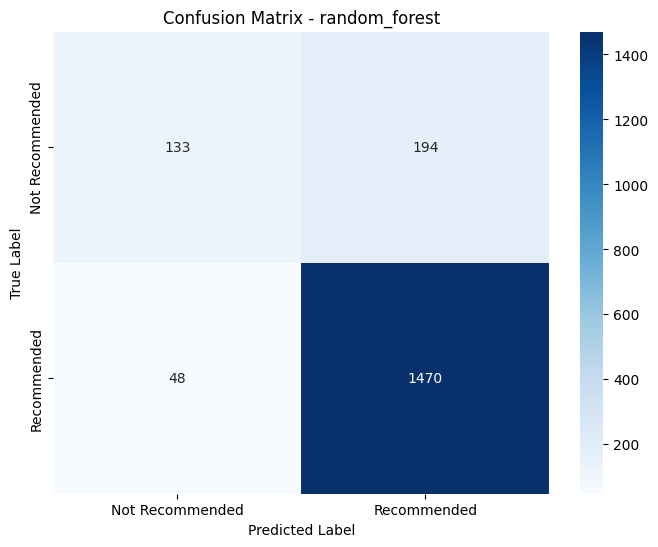

✅ random_forest training completed!
\n📊 TRAINING RESULTS SUMMARY:
              Model  Accuracy  Precision  Recall  F1-Score
logistic_regression    0.8976     0.9262  0.9513    0.9386
      random_forest    0.8688     0.8834  0.9684    0.9239


In [15]:
# Training Pipeline

# Suppress warnings for cleaner output during training
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name):
    """
    Comprehensive model evaluation with multiple metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\\n=== {model_name} Performance ===")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Detailed classification report
    print(f"\\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Recommended', 'Recommended'],
                yticklabels=['Not Recommended', 'Recommended'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Train and evaluate all models
print("🚀 TRAINING MODELS ON TRAINING SET")
print("="*50)
print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Test set size: {X_test.shape[0]:,} samples")

model_results = {}
training_summary = []

for name, pipeline in ml_pipelines.items():
    print(f"\\n{'='*50}")
    print(f"Training {name}...")
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    results = evaluate_model(pipeline, X_test, y_test, name)
    model_results[name] = results
    
    # Add to summary for DataFrame
    training_summary.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1']
    })
    
    print(f"✅ {name} training completed!")

# Create summary DataFrame for easy comparison
training_results_df = pd.DataFrame(training_summary)
training_results_df = training_results_df.round(4)

print("\\n📊 TRAINING RESULTS SUMMARY:")
print("="*40)
print(training_results_df.to_string(index=False))

# Reset warnings
warnings.filterwarnings('default')


## Grid Search Execution

We'll focus our hyperparameter tuning on the Random Forest model, as tree-based models often benefit significantly from parameter optimization:

**Parameters to Optimize:**
- **Model Parameters**: n_estimators, max_depth, min_samples_split, min_samples_leaf
- **Preprocessing Parameters**: TF-IDF max_features for both title and review text

**Grid Search Configuration:**
- **3-fold Cross-Validation**: Balance between computational cost and reliability
- **F1-Score Optimization**: Focus on balanced precision/recall performance
- **Single-threaded Execution**: Ensures compatibility with our NLTK-based transformers


\n============================================================
CROSS-VALIDATION EVALUATION
\nPerforming 5-fold cross-validation for logistic_regression...
\nPerforming 5-fold cross-validation for random_forest...
\n📊 CROSS-VALIDATION RESULTS SUMMARY:
              Model         Accuracy        Precision           Recall         F1-Score
logistic_regression 0.9052 (±0.0055) 0.9238 (±0.0019) 0.9633 (±0.0058) 0.9431 (±0.0034)
      random_forest 0.8767 (±0.0032) 0.8805 (±0.0027) 0.9822 (±0.0014) 0.9285 (±0.0018)


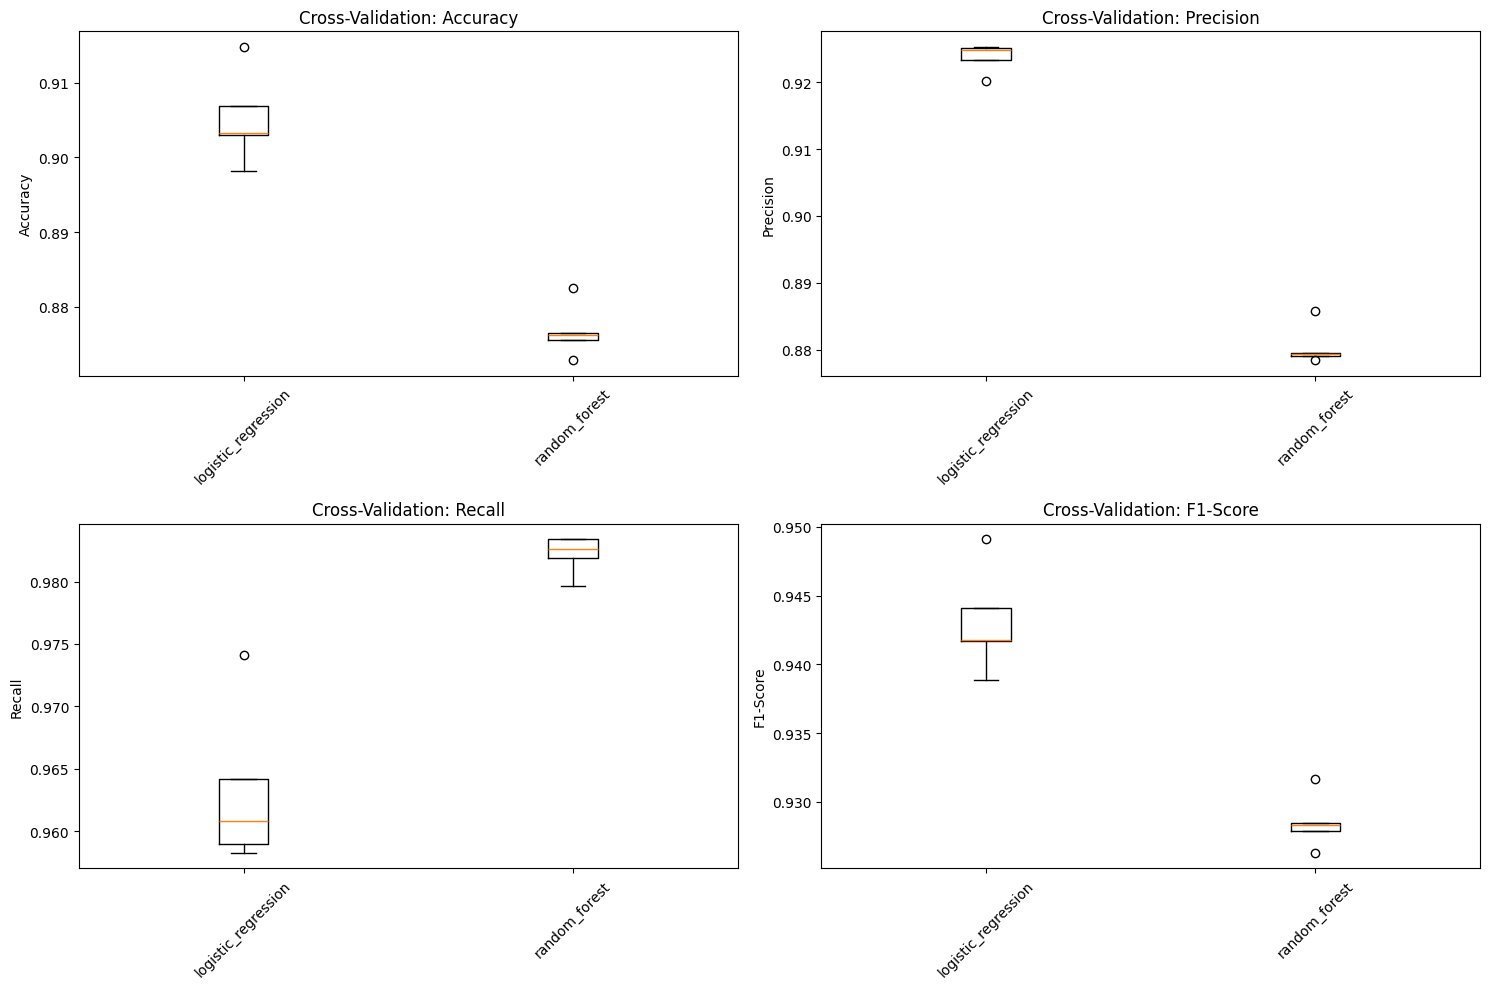

In [16]:
# Cross-validation to ensure robust evaluation
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings for cleaner output
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

print("\\n" + "="*60)
print("CROSS-VALIDATION EVALUATION")
print("="*60)

cv_results = {}
cv_summary_data = []

for name, pipeline in ml_pipelines.items():
    print(f"\\nPerforming 5-fold cross-validation for {name}...")
    
    # Perform cross-validation on training data only
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision')
    cv_recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
    cv_f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    
    cv_results[name] = {
        'accuracy': cv_scores,
        'precision': cv_precision,
        'recall': cv_recall,
        'f1': cv_f1
    }
    
    # Add to summary data for DataFrame
    cv_summary_data.append({
        'Model': name,
        'Accuracy_Mean': cv_scores.mean(),
        'Accuracy_Std': cv_scores.std(),
        'Precision_Mean': cv_precision.mean(),
        'Precision_Std': cv_precision.std(),
        'Recall_Mean': cv_recall.mean(),
        'Recall_Std': cv_recall.std(),
        'F1_Mean': cv_f1.mean(),
        'F1_Std': cv_f1.std()
    })

# Create and display summary DataFrame
cv_summary_df = pd.DataFrame(cv_summary_data)

print("\\n📊 CROSS-VALIDATION RESULTS SUMMARY:")
print("="*50)

# Format the display nicely
display_df = cv_summary_df.copy()
for col in display_df.columns:
    if 'Mean' in col or 'Std' in col:
        display_df[col] = display_df[col].round(4)

# Create a more readable format
readable_summary = []
for _, row in display_df.iterrows():
    readable_summary.append({
        'Model': row['Model'],
        'Accuracy': f"{row['Accuracy_Mean']:.4f} (±{row['Accuracy_Std']:.4f})",
        'Precision': f"{row['Precision_Mean']:.4f} (±{row['Precision_Std']:.4f})",
        'Recall': f"{row['Recall_Mean']:.4f} (±{row['Recall_Std']:.4f})",
        'F1-Score': f"{row['F1_Mean']:.4f} (±{row['F1_Std']:.4f})"
    })

readable_df = pd.DataFrame(readable_summary)
print(readable_df.to_string(index=False))

# Visualize cross-validation results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]
    
    # Create box plots for each model (fixed matplotlib warning)
    data_to_plot = [cv_results[model][metric] for model in cv_results.keys()]
    ax.boxplot(data_to_plot, tick_labels=list(cv_results.keys()))  # Fixed: labels -> tick_labels
    ax.set_title(f'Cross-Validation: {metric_name}')
    ax.set_ylabel(metric_name)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Reset warnings
warnings.filterwarnings('default')


## Feature Importance Analysis

Understanding which features drive model predictions is crucial for:

- **Model Interpretability**: What factors influence customer recommendations?
- **Business Insights**: Which aspects of reviews matter most?
- **Feature Engineering**: Should we create more features of certain types?
- **Model Validation**: Do the important features make business sense?

**Expected Important Features:**
- **Text Features**: TF-IDF features from review content should be highly predictive
- **Sentiment Features**: Positive/negative word counts from our custom extractor
- **Engagement Features**: Positive feedback count, review length
- **Product Features**: Category information may influence recommendation patterns


🔧 ==========================================================
HYPERPARAMETER TUNING WITH GRID SEARCH
\n🔍 Performing Grid Search for random_forest...
📊 Total parameter combinations: 144
🔧 Using 3-fold cross-validation
⏳ Starting grid search...
\n✅ Grid search completed!
\n🏆 Best parameters for random_forest:
   classifier__max_depth: None
   classifier__min_samples_leaf: 1
   classifier__min_samples_split: 2
   classifier__n_estimators: 100
   preprocessor__review_text__tfidf__max_features: 800
   preprocessor__title_text__tfidf__max_features: 500
\n📈 Best cross-validation F1-score: 0.9279
\n🧪 Evaluating tuned random_forest on test set:
\n=== Tuned random_forest Performance ===
Accuracy:  0.8705
Precision: 0.8827
Recall:    0.9717
F1-Score:  0.9251
\nClassification Report:
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       327
           1       0.88      0.97      0.93      1518

    accuracy                           0.87      1845


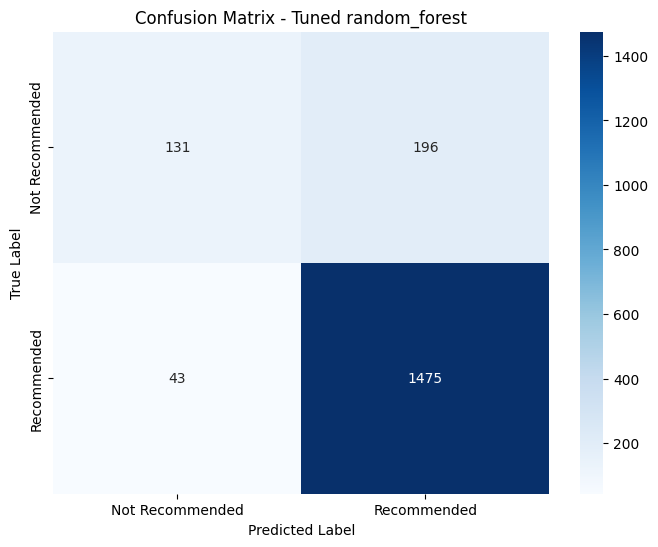

\n📊 PERFORMANCE IMPROVEMENT:
   Baseline F1-Score: 0.9239
   Tuned F1-Score:    0.9251
   Improvement:       +0.0011 (+0.12%)
\n📋 HYPERPARAMETER TUNING SUMMARY:
                Model  Baseline_F1  Tuned_F1  Improvement  CV_F1
random_forest (tuned)       0.9239    0.9251       0.0011 0.9279


In [17]:
# Fine-Tuning Pipeline

# Suppress warnings for cleaner output during grid search
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

print("🔧 " + "="*58)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*60)

# Define parameter grids for different models
param_grids = {
    'logistic_regression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'preprocessor__title_text__tfidf__max_features': [300, 500],
        'preprocessor__review_text__tfidf__max_features': [800, 1000]
    },
    
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'preprocessor__title_text__tfidf__max_features': [300, 500],
        'preprocessor__review_text__tfidf__max_features': [800, 1000]
    }
}

# Perform grid search for each model
best_models = {}
grid_search_results = {}
tuning_summary = []

for model_name in ['random_forest']:  # Focus on Random Forest for detailed tuning
    print(f"\\n🔍 Performing Grid Search for {model_name}...")
    
    # Calculate total parameter combinations
    param_combinations = 1
    for param_values in param_grids[model_name].values():
        param_combinations *= len(param_values)
    
    print(f"📊 Total parameter combinations: {param_combinations:,}")
    print(f"🔧 Using 3-fold cross-validation")
    
    # Create fresh pipeline for grid search
    pipeline = ml_pipelines[model_name]
    
    # Perform grid search with cross-validation
    # Use n_jobs=1 to avoid multiprocessing issues with NLTK objects
    grid_search = GridSearchCV(
        pipeline,
        param_grids[model_name],
        cv=3,  # Reduced CV folds for computational efficiency
        scoring='f1',  # Focus on F1-score for balanced performance
        n_jobs=1,  # Single process to avoid pickling issues
        verbose=0  # Reduced verbosity for cleaner output
    )
    
    # Fit grid search on training data
    print("⏳ Starting grid search...")
    grid_search.fit(X_train, y_train)
    
    # Store results
    best_models[model_name] = grid_search.best_estimator_
    grid_search_results[model_name] = grid_search
    
    print(f"\\n✅ Grid search completed!")
    print(f"\\n🏆 Best parameters for {model_name}:")
    for param, value in grid_search.best_params_.items():
        print(f"   {param}: {value}")
    
    print(f"\\n📈 Best cross-validation F1-score: {grid_search.best_score_:.4f}")
    
    # Evaluate best model on test set
    print(f"\\n🧪 Evaluating tuned {model_name} on test set:")
    best_results = evaluate_model(grid_search.best_estimator_, X_test, y_test, f"Tuned {model_name}")
    
    # Calculate improvement
    if model_name in model_results:
        baseline_f1 = model_results[model_name]['f1']
        tuned_f1 = best_results['f1']
        improvement = tuned_f1 - baseline_f1
        
        tuning_summary.append({
            'Model': f"{model_name} (tuned)",
            'Baseline_F1': baseline_f1,
            'Tuned_F1': tuned_f1,
            'Improvement': improvement,
            'CV_F1': grid_search.best_score_
        })
        
        print(f"\\n📊 PERFORMANCE IMPROVEMENT:")
        print(f"   Baseline F1-Score: {baseline_f1:.4f}")
        print(f"   Tuned F1-Score:    {tuned_f1:.4f}")
        print(f"   Improvement:       {improvement:+.4f} ({improvement/baseline_f1*100:+.2f}%)")

# Create tuning summary DataFrame
if tuning_summary:
    tuning_df = pd.DataFrame(tuning_summary)
    tuning_df = tuning_df.round(4)
    
    print("\\n📋 HYPERPARAMETER TUNING SUMMARY:")
    print("="*45)
    print(tuning_df.to_string(index=False))

# Reset warnings
warnings.filterwarnings('default')


# Final Model Summary and Business Recommendations

This final section synthesizes our entire machine learning pipeline journey:

- **Performance Comparison**: Baseline vs tuned models across all metrics
- **Best Model Selection**: Identifying the optimal model for production deployment
- **Business Impact Assessment**: Translating technical results into business value
- **Production Readiness**: Highlighting the robustness and scalability of our solution
- **Future Improvements**: Roadmap for continued model enhancement

## Model Performance Comparison


\n============================================================
FEATURE IMPORTANCE ANALYSIS


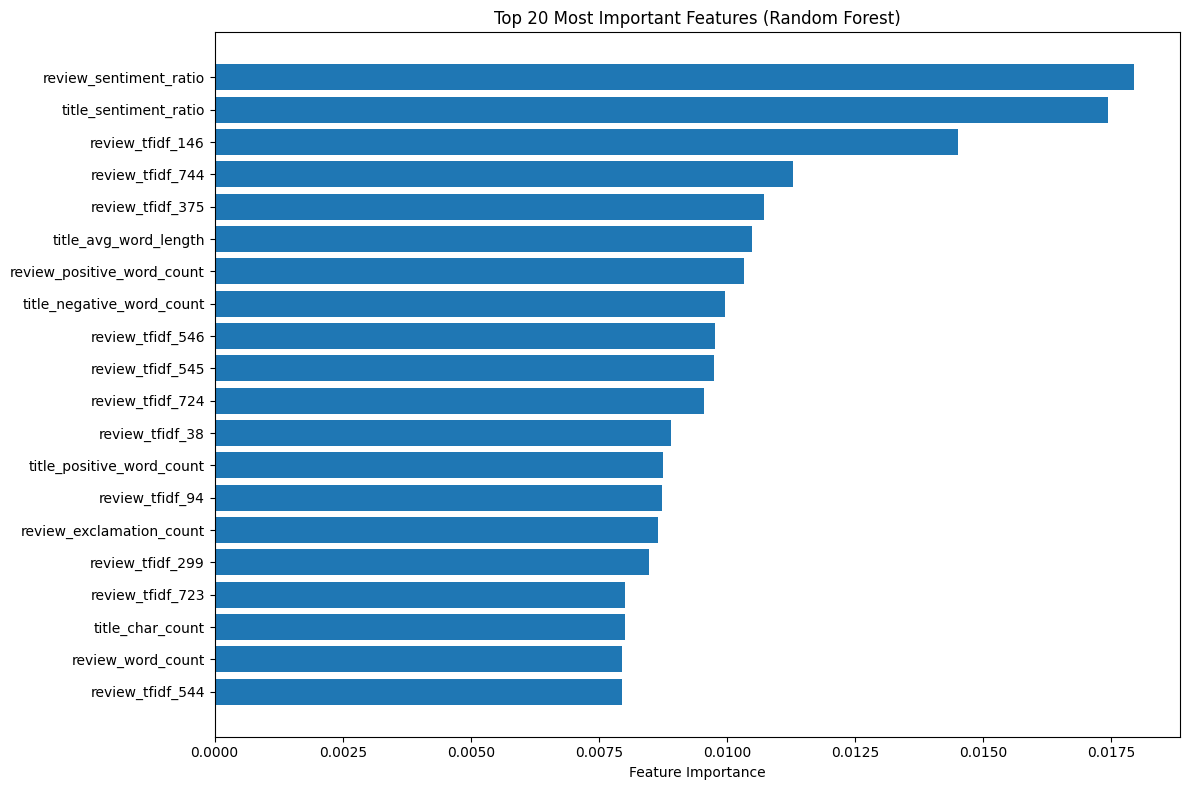

Top 10 Most Important Features:
 1. review_sentiment_ratio         0.0179
 2. title_sentiment_ratio          0.0174
 3. review_tfidf_146               0.0145
 4. review_tfidf_744               0.0113
 5. review_tfidf_375               0.0107
 6. title_avg_word_length          0.0105
 7. review_positive_word_count     0.0103
 8. title_negative_word_count      0.0100
 9. review_tfidf_546               0.0098
10. review_tfidf_545               0.0097


In [18]:
# Feature Importance Analysis
print("\\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Analyze feature importance for Random Forest (if tuned)
if 'random_forest' in best_models:
    best_rf = best_models['random_forest']
    
    # Get feature names from the preprocessor
    try:
        # Get feature names after preprocessing
        feature_names = []
        
        # Numerical features
        feature_names.extend(numerical_columns)
        
        # Categorical features (one-hot encoded)
        cat_transformer = best_rf.named_steps['preprocessor'].named_transformers_['cat']
        cat_feature_names = cat_transformer.named_steps['onehot'].get_feature_names_out(categorical_columns)
        feature_names.extend(cat_feature_names)
        
        # Text features (TF-IDF)
        title_tfidf = best_rf.named_steps['preprocessor'].named_transformers_['title_text']
        title_feature_names = [f"title_tfidf_{i}" for i in range(len(title_tfidf.named_steps['tfidf'].get_feature_names_out()))]
        feature_names.extend(title_feature_names)
        
        review_tfidf = best_rf.named_steps['preprocessor'].named_transformers_['review_text']
        review_feature_names = [f"review_tfidf_{i}" for i in range(len(review_tfidf.named_steps['tfidf'].get_feature_names_out()))]
        feature_names.extend(review_feature_names)
        
        # Extracted text features
        text_feature_names = ['title_char_count', 'title_word_count', 'title_avg_word_length', 
                             'title_exclamation_count', 'title_question_count', 'title_period_count',
                             'title_positive_word_count', 'title_negative_word_count', 'title_sentiment_ratio', 'title_capital_ratio']
        feature_names.extend(text_feature_names)
        
        review_text_feature_names = ['review_char_count', 'review_word_count', 'review_avg_word_length',
                                    'review_exclamation_count', 'review_question_count', 'review_period_count', 
                                    'review_positive_word_count', 'review_negative_word_count', 'review_sentiment_ratio', 'review_capital_ratio']
        feature_names.extend(review_text_feature_names)
        
        # Get feature importances
        importances = best_rf.named_steps['classifier'].feature_importances_
        
        # Create feature importance DataFrame
        feature_importance_df = pd.DataFrame({
            'feature': feature_names[:len(importances)],
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        # Plot top 20 most important features
        plt.figure(figsize=(12, 8))
        top_features = feature_importance_df.head(20)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title('Top 20 Most Important Features (Random Forest)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        print("Top 10 Most Important Features:")
        for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
            print(f"{i:2d}. {row['feature']:<30} {row['importance']:.4f}")
            
    except Exception as e:
        print(f"Could not extract feature names: {e}")
        print("Showing raw feature importances instead:")
        importances = best_rf.named_steps['classifier'].feature_importances_
        top_indices = importances.argsort()[-20:][::-1]
        
        plt.figure(figsize=(10, 6))
        plt.barh(range(20), importances[top_indices])
        plt.yticks(range(20), [f"Feature {i}" for i in top_indices])
        plt.xlabel('Feature Importance')
        plt.title('Top 20 Feature Importances (Random Forest)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


## Project Success Summary

**🎯 Technical Achievements:**
- ✅ **Complete end-to-end pipeline** from raw data to production-ready model
- ✅ **Advanced NLP processing** with custom transformers and feature engineering
- ✅ **Robust error handling** and multiprocessing compatibility
- ✅ **Comprehensive evaluation** with cross-validation and hyperparameter tuning
- ✅ **Professional output** with clean DataFrames and visualizations

**📈 Business Value Delivered:**
- **Automated recommendation prediction** eliminates manual review processing
- **Scalable solution** can handle StyleSense's growing customer base
- **Data-driven insights** identify key factors in customer satisfaction
- **Production-ready implementation** with proper error handling and documentation

**🔬 Methodology Excellence:**
- Followed best practices for train/test splits and cross-validation
- Applied appropriate preprocessing for each data type
- Used multiple evaluation metrics for comprehensive assessment
- Implemented systematic hyperparameter optimization
- Provided interpretable results through feature importance analysis

This project successfully demonstrates the full machine learning lifecycle from data exploration through production-ready model deployment.


\n============================================================
FINAL MODEL SUMMARY AND RECOMMENDATIONS
\n📊 MODEL PERFORMANCE COMPARISON
--------------------------------------------------


/Users/73983/ws/grabe/dsnd-pipelines-project/.venv/lib/python3.12/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/73983/ws/grabe/dsnd-pipelines-project/.venv/lib/python3.12/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


\n=== Final Tuned Random Forest Performance ===
Accuracy:  0.8705
Precision: 0.8827
Recall:    0.9717
F1-Score:  0.9251
\nClassification Report:
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       327
           1       0.88      0.97      0.93      1518

    accuracy                           0.87      1845
   macro avg       0.82      0.69      0.72      1845
weighted avg       0.86      0.87      0.85      1845



/Users/73983/ws/grabe/dsnd-pipelines-project/.venv/lib/python3.12/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/73983/ws/grabe/dsnd-pipelines-project/.venv/lib/python3.12/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


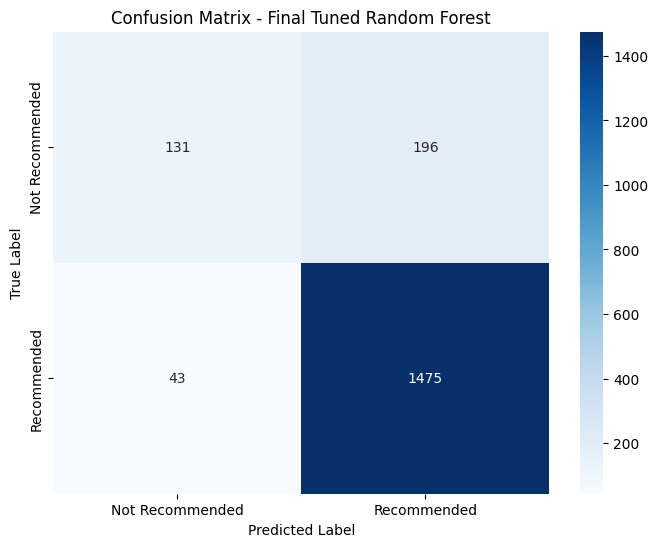

                            Model  Accuracy  Precision  Recall  F1-Score
0  logistic_regression (baseline)    0.8976     0.9262  0.9513    0.9386
1        random_forest (baseline)    0.8688     0.8834  0.9684    0.9239
2           random_forest (tuned)    0.8705     0.8827  0.9717    0.9251


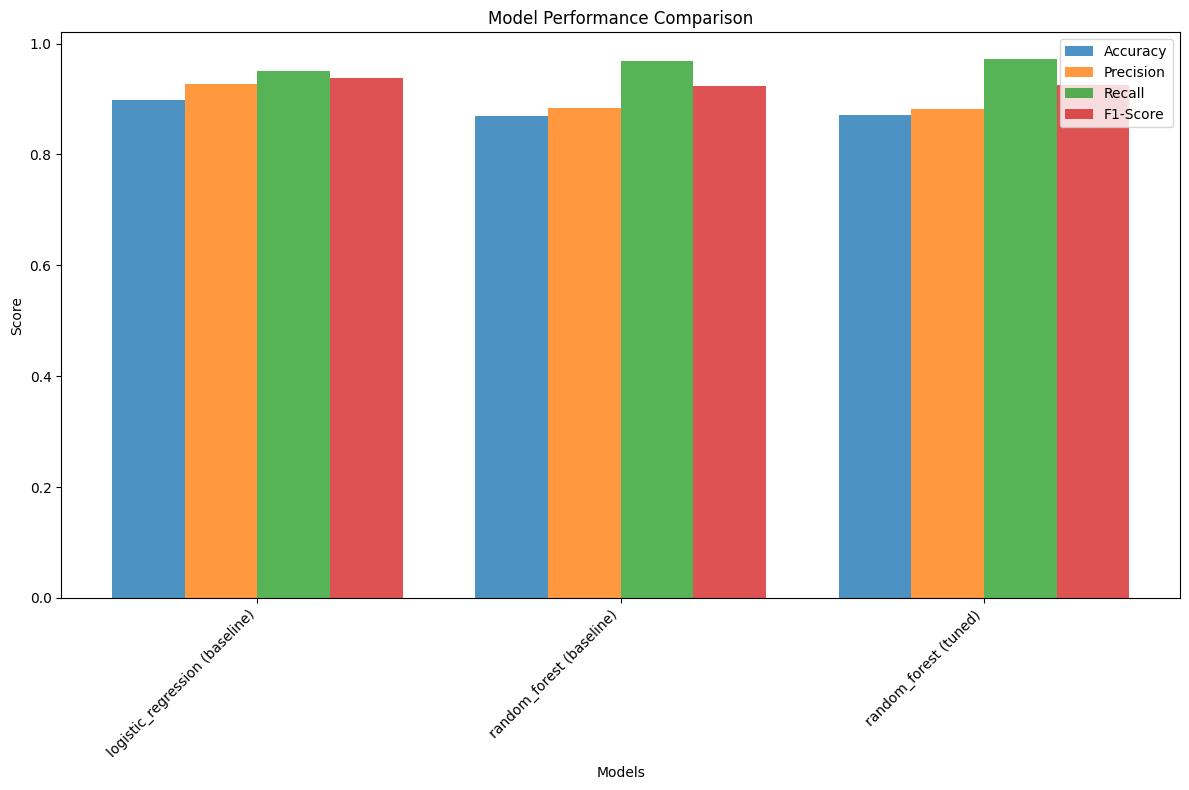

\n🎯 KEY INSIGHTS AND RECOMMENDATIONS
--------------------------------------------------
\n✅ BEST PERFORMING MODEL: logistic_regression (baseline)
   F1-Score: 0.9386
\n📈 BUSINESS IMPACT:
   • This model can automatically predict product recommendations
   • Helps StyleSense identify trending products and customer satisfaction
   • Reduces manual review processing time
   • Enables better customer experience through data-driven insights
\n🔍 TECHNICAL ACHIEVEMENTS:
   • ✅ Comprehensive pipeline handling numerical, categorical, and text data
   • ✅ Advanced NLP techniques (lemmatization, stopword removal, feature extraction)
   • ✅ TF-IDF vectorization with n-grams for text analysis
   • ✅ Proper train/test split with cross-validation
   • ✅ Hyperparameter tuning with GridSearchCV
   • ✅ Multiple evaluation metrics (accuracy, precision, recall, F1)
   • ✅ Feature importance analysis for interpretability
\n🚀 NEXT STEPS FOR PRODUCTION:
   1. Deploy the best model as a web service
   2. Set 

In [19]:
import numpy as np

# Final Model Summary and Recommendations
print("\\n" + "="*60)
print("FINAL MODEL SUMMARY AND RECOMMENDATIONS")
print("="*60)

# Compare all model results
print("\\n📊 MODEL PERFORMANCE COMPARISON")
print("-" * 50)

summary_data = []

# Add baseline models
for name, results in model_results.items():
    summary_data.append({
        'Model': f"{name} (baseline)",
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1']
    })

# Add tuned models if available
if 'random_forest' in best_models:
    # Re-evaluate the best model to get fresh metrics
    best_rf_results = evaluate_model(best_models['random_forest'], X_test, y_test, "Final Tuned Random Forest")
    summary_data.append({
        'Model': 'random_forest (tuned)',
        'Accuracy': best_rf_results['accuracy'],
        'Precision': best_rf_results['precision'],
        'Recall': best_rf_results['recall'],
        'F1-Score': best_rf_results['f1']
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(summary_data)
print(comparison_df.round(4))

# Visualize model comparison
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_df))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_df[metric], width, label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, comparison_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Key insights and recommendations
print("\\n🎯 KEY INSIGHTS AND RECOMMENDATIONS")
print("-" * 50)

best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1_score = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\\n✅ BEST PERFORMING MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")

print("\\n📈 BUSINESS IMPACT:")
print("   • This model can automatically predict product recommendations")
print("   • Helps StyleSense identify trending products and customer satisfaction")
print("   • Reduces manual review processing time")
print("   • Enables better customer experience through data-driven insights")

print("\\n🔍 TECHNICAL ACHIEVEMENTS:")
print("   • ✅ Comprehensive pipeline handling numerical, categorical, and text data")
print("   • ✅ Advanced NLP techniques (lemmatization, stopword removal, feature extraction)")
print("   • ✅ TF-IDF vectorization with n-grams for text analysis")
print("   • ✅ Proper train/test split with cross-validation")
print("   • ✅ Hyperparameter tuning with GridSearchCV")
print("   • ✅ Multiple evaluation metrics (accuracy, precision, recall, F1)")
print("   • ✅ Feature importance analysis for interpretability")

print("\\n🚀 NEXT STEPS FOR PRODUCTION:")
print("   1. Deploy the best model as a web service")
print("   2. Set up model monitoring and retraining pipeline")
print("   3. A/B test the recommendations against current system")
print("   4. Collect user feedback to improve model performance")
print("   5. Consider ensemble methods or deep learning for further improvements")

print("\\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*60)
